In [1]:
library(netReg)
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [2]:
set.seed(1)
n <- 40
p <- 30

In [3]:
X <- matrix(rnorm(n * p), n, p)

Set up a graph!

In [4]:
G <- matrix(0, ncol(X), ncol(X))
for (i in seq(1, ncol(X), by=5))
{
  G[i:(i+4), i:(i+4)] <- 1  
}
diag(G) <- 0

graph <- graph_from_adjacency_matrix(G, mode = "undirected")

We are kinda enforcing strong prior knowledge here, which is whenever we can use netReg. For cases where our graphs badly inform our data, netReg will probably not perform very well.

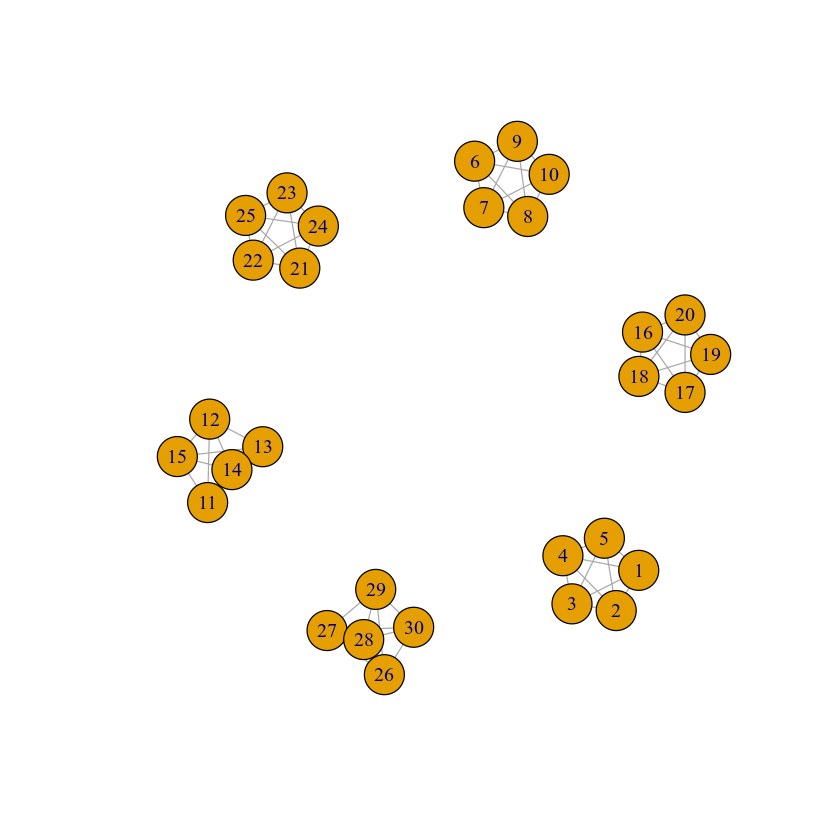

In [5]:
plot(graph)

Compute coefficient relations from the graph. This is how the model assumes how the biology is setup, i.e. coefficients that are related share edges in the graph.

In [6]:
components <- igraph::components(graph)$membership
B <- vector(length = ncol(X))
for (i in seq(unique(components))) 
{
  B[which(components == i)] <- rnorm(1)
}

Create a data set. Notice that we use a variance of 1, just as we did for the creation of $\mathbf{X}$ (which is a lot). A normal least squares should'nt be able to infer the coefficients correctly.

In [7]:
Y <- X %*% B + rnorm(nrow(X), 0, 1)

Infer the optimal parameters using cv (this is buggy on the cmd line it seems and even her psigy is estimaed when it shouldn't). 

In [8]:
(c <- cv.edgenet(X, Y, G.X = G))


Call: cv.edgenet.default(X = X, Y = Y, G.X = G)

Parameters:
     lambda       psigx       psigy 
  0.8894601 134.7864899  24.0740086 
Family:
[1] "gaussian"

True parameters:

In [9]:
B

[1] -0.4652707 -0.4652707 -0.4652707 -0.4652707 -0.4652707 -0.1944989
 [7] -0.1944989 -0.1944989 -0.1944989 -0.1944989 -0.9236070 -0.9236070
[13] -0.9236070 -0.9236070 -0.9236070 -0.6417357 -0.6417357 -0.6417357
[19] -0.6417357 -0.6417357 -0.4693855 -0.4693855 -0.4693855 -0.4693855
[25] -0.4693855 -0.1992442 -0.1992442 -0.1992442 -0.1992442 -0.1992442

Edgnet parameters:

In [10]:
as.vector(edgenet(X, Y, G.X = G, lambda=c$lambda, psigx = c$psigx)$coefficients)

[1] -0.4726797030 -0.4537706360 -0.4665812694 -0.4778037357 -0.4382782745
 [6]  0.0003572825 -0.0037037643  0.0000000000 -0.0076565607 -0.0162865932
[11] -0.7932895494 -0.8335218304 -0.8030315433 -0.8102548181 -0.8208240031
[16] -0.5915891119 -0.5921696199 -0.6008110188 -0.5917749601 -0.6039117350
[21] -0.3319398481 -0.3607358450 -0.3526439970 -0.3371129511 -0.3577506044
[26] -0.1613879913 -0.1479499595 -0.1631668514 -0.1364782145 -0.1587543745

Least squares parameters:

In [11]:
as.vector(coef(lm(Y ~ X)))

[1] -0.18728703 -0.63518786 -0.75384651 -1.05371438 -1.29487719 -0.17668325
 [7]  0.26787808 -0.09457511  0.19904352 -0.39455302 -0.11547598 -0.82849618
[13] -1.22660820 -0.78066119 -1.05268921 -1.01314940 -0.32978434 -0.06301311
[19] -0.47679090 -0.91965438 -0.42915605 -0.43429128 -0.49439253 -0.55186860
[25]  0.17774739 -0.64393569 -0.30218688 -0.14078430 -0.70060166 -0.15723260
[31] -0.26389800